# Using **pyimcyto** to segment nuclei and cells in imaging mass cytometry data.

This is an example notebook showing how to use **py-imcyto** to segment nuclei and cells in IMC images. Click below to run in Google Colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/FrancisCrickInstitute/py-imcyto/blob/main/notebooks/pyimcyto_google_colab.ipynb)

**py-imcyto** is a Python-only implementation of the segmentation model packaged with the TRACERx-PHLEX multiplexed imaging pipeline.

For information on TRACERx-PHLEX multiplexed imaging pipeline see the following:
- The [TRACERx-PHLEX Github](https://github.com/FrancisCrickInstitute/TRACERx-PHLEX)
- The [TRACERx-PHLEX readthedocs](https://tracerx-phlex.readthedocs.io/en/main/)

# Set up the Colaboratory.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np

Mounted at /content/gdrive


# Download and unzip the deep-imcyto weights:

The TRACERx-PHLEX Zenodo repository, containing weights, test images and other data for running the whole PHLEX pipeline is available [here](https://doi.org/10.5281/zenodo.7573268).

In [ ]:
# !wget https://zenodo.org/record/7973724/files/deep-imcyto_weights.zip
!unzip /content/gdrive/MyDrive/deep-imcyto/deep-imcyto_weights.zip

Archive:  /content/gdrive/MyDrive/deep-imcyto/deep-imcyto_weights.zip
   creating: deep-imcyto_weights/
  inflating: deep-imcyto_weights/com.hdf5  
  inflating: deep-imcyto_weights/boundaries.hdf5  
  inflating: deep-imcyto_weights/nucleus_edge_weighted.hdf5  
  inflating: deep-imcyto_weights/nuclear_morph_scaler.pkl  
  inflating: deep-imcyto_weights/AE_weights.hdf5  


In [ ]:
# !rm -r deep-imcyto_weights/

# Clone the py-imcyto repository into the Colab environment from [GitHub](https://github.com/FrancisCrickInstitute/py-imcyto).

In [ ]:
!git clone https://github.com/FrancisCrickInstitute/py-imcyto.git

Cloning into 'py-imcyto'...
remote: Enumerating objects: 967, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 967 (delta 12), reused 27 (delta 7), pack-reused 931
Receiving objects: 100% (967/967), 118.33 MiB | 37.34 MiB/s, done.
Resolving deltas: 100% (343/343), done.


In [ ]:
import sys
sys.path.append('./py-imcyto')

# Initialise the deep-imcyto model.

In [ ]:
from pyimcyto.seg import deepimcyto
dicy = deepimcyto('./deep-imcyto_weights/')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Initialised deep-imcyto model.


# Run prediction on the test images.

In [ ]:
import glob
import skimage.io as io

def get_tile(image):
    '''
    Function to return the centre 512x512 pixel tile of a larger image.
    '''
    return image[image.shape[0]//2 - 256:image.shape[0]//2 + 256, image.shape[1]//2 - 256:image.shape[1]//2 + 256]

image_paths = glob.glob('./py-imcyto/pyimcyto/data/*.png')
image_paths.sort()

# Predict on either the full image, or the central tile (full image will take longer)
full_image = False

for path in image_paths:

    # read in image
    image = io.imread(path)

    # In this example predict on 512x512 region in center of image:
    if full_image:
        dicy.predict(image)
    else:
        tile = get_tile(image)
        dicy.predict(tile)



# Visualise the segmentation results.

In [ ]:
# First, use the deep-imcyto methods get_boundaries() and make_overlays() to get the boundaries of the instance segmentation mask and overlay this on the test images:

dicy.get_boundaries() # get boundaries of instance mask
dicy.make_overlays() # overlay on test image

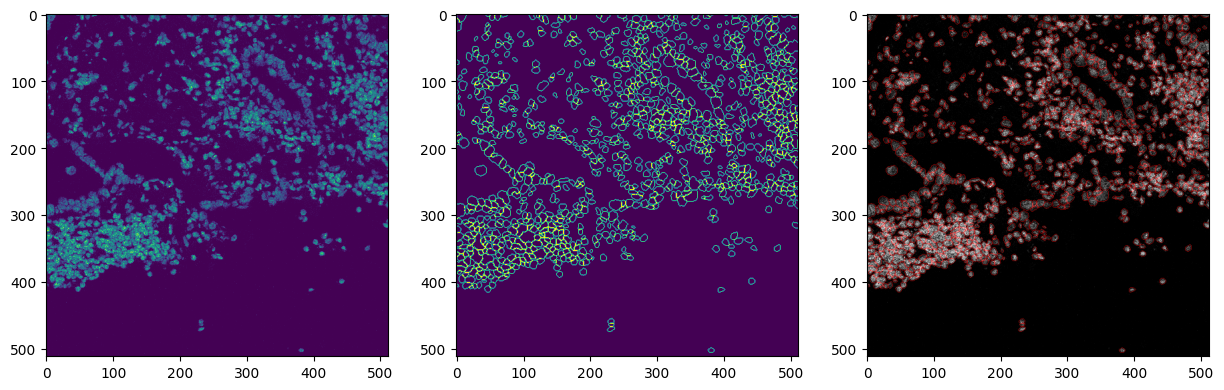

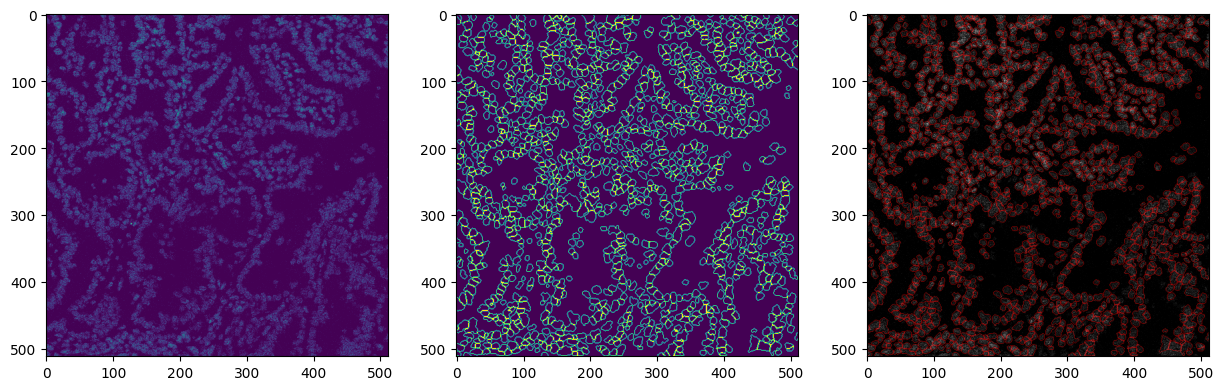

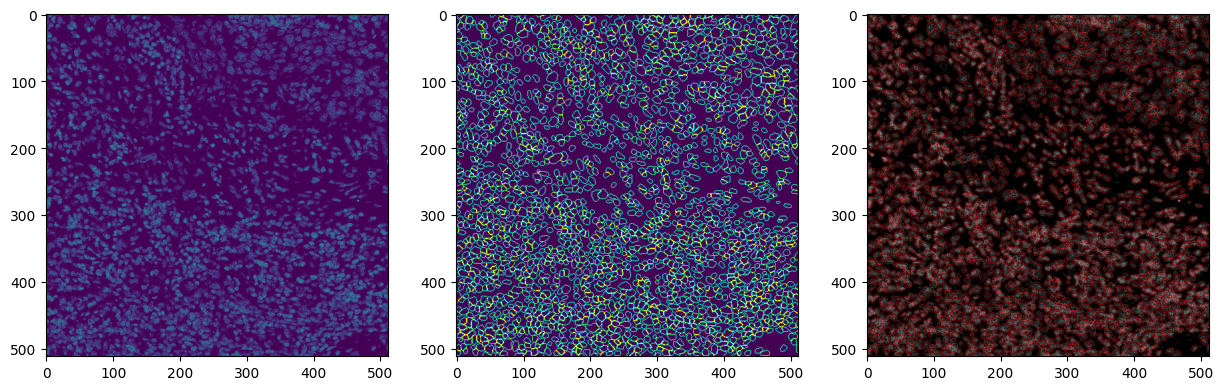

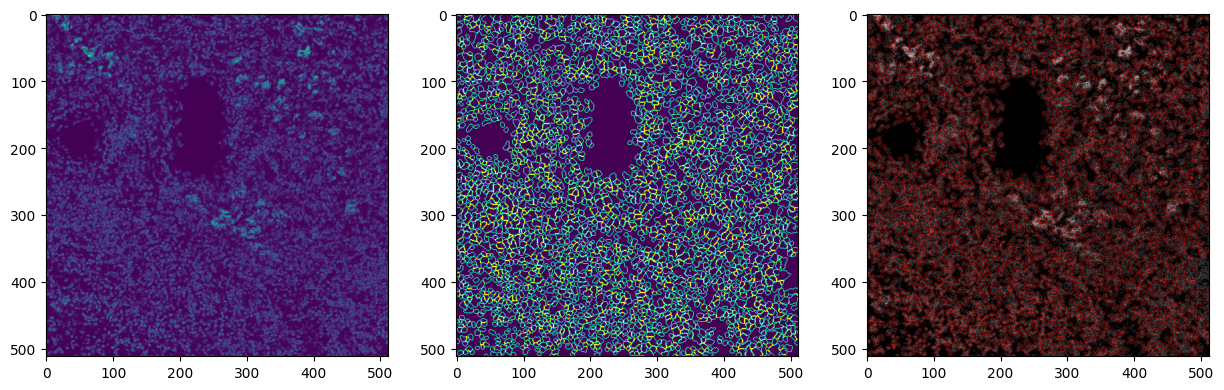

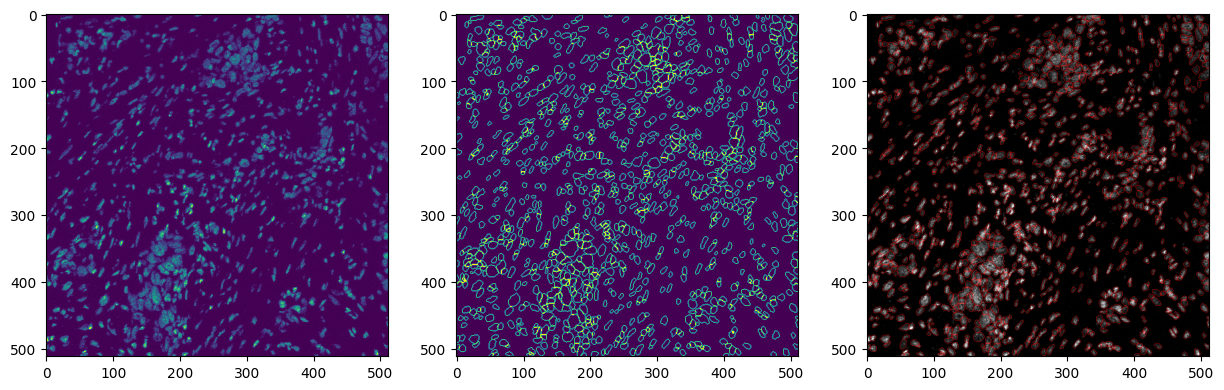

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
  image = dicy.test_images[i]
  mask = dicy.prediction_boundaries[i]
  overlay = dicy.overlays[i]
  ax[0].imshow(image)
  ax[1].imshow(mask)
  ax[2].imshow(overlay)